In [65]:
#Practice ML stuff

In [137]:
import numpy as np
from numpy.polynomial.polynomial import polyfromroots
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

In [91]:
# Make fake data to try it out on

def fake_profiles(x, roots):
    c = polyfromroots(roots) #gives polynomial coefficients before integrating back
    y = 0 #change to chosen const 
    N_roots = len(roots)
    for i in range(N_roots+1):
        temp = c[i]/(i+1) * x**(i+1)
        y += temp
    return y


In [92]:
def minima_finding(data):
    
    minima = argrelextrema(data, np.less)[0] #all minima
    test_SP = np.argmin(data) #lowest data point
                 
    minima_range = np.arange(156,200,1) 

    k = 0
    l = 0
        
    #where to saev minima values found to be in range
    minima_in_range = np.array([], dtype=int)
    for j in minima:
        if j in minima_range:
            test_SP = j
            minima_in_range = np.append(minima_in_range, j)
            l += 1
        else:
            k += 1
                
    if l > 1:
        #if there are more than one minima in range, take the deepest
        test_SP = minima_in_range[np.argmin(data[minima_in_range])]
                
    elif k == len(minima):
        #if there are no minima in range, take the deepest overall
        test_SP = minima[np.argmin(data[minima])]

        
    return test_SP #returns arg of minima

In [122]:
N_data_set = 1000
N_data = 200

x = np.linspace(0,1.5,N_data)

X = np.zeros((N_data_set, N_data))
y = np.zeros(N_data_set)

for i in range(N_data_set):
    roots1 = np.random.randint(30,60,size=3)/60
    roots2 = np.random.randint(-10,120,size=4)/60
    roots = np.hstack((roots1,roots2))
    poly = fake_profiles(x, roots)
    poly = poly / np.mean(poly) * -2
    X[i,:] = poly
    try:
        y[i] = x[minima_finding(poly)]
    except ValueError:
        plt.plot(x, poly)
        plt.show()
    

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
DTreg = tree.DecisionTreeRegressor()
DTreg = DTreg.fit(X_train, y_train)
y_predict = DTreg.predict(X_test)

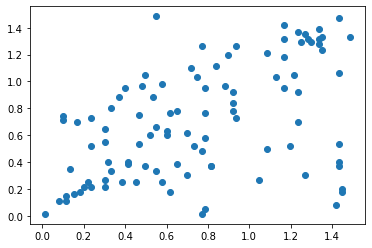

In [139]:
plt.scatter(y_predict, y_test)
plt.show()
